In [1]:
def get_legendre_polynomials(max_order, normalization_constant):
    # legendre_P give orthogonal polynomials over (-1, 1)
    legendre_array = [legendre_P(i, x).function(x) for i in range(max_order)]
    # need to normalize
    norms_squared = [(legendre_array[l]*legendre_array[l]).integrate(x, -1, 1) for l in range(max_order)]
    phi = [(1/sqrt(norms_squared[l]*normalization_constant)*legendre_array[l]) for l in range(max_order)]
    return phi

In [2]:
def check_orthogonality(phi):
    max_order = len(phi)
    for l in range(max_order):
        for m in range(max_order):
            actual_integral = (phi[l]*phi[m]).integrate(x, -1, 1)
            if l != m:
                assert(actual_integral == 0)
    return True

In [3]:
def check_normality(phi, normalization_constant):
    max_order = len(phi)
    for l in range(max_order):
        actual_integral = (normalization_constant*phi[l]*phi[l]).integrate(x, -1, 1)
        assert(actual_integral == 1)
    return True

In [4]:
def l2_project(function, ):
    
    pass

In [5]:
phi = get_legendre_polynomials(10, 1/2)
check_orthogonality(phi)
check_normality(phi, 1/2)

True

In [6]:
phi

[x |--> 1,
 x |--> 3*sqrt(1/3)*x,
 x |--> 5/2*sqrt(1/5)*(3*x^2 - 1),
 x |--> 7/2*sqrt(1/7)*(5*x^3 - 3*x),
 x |--> 105/8*x^4 - 45/4*x^2 + 9/8,
 x |--> 11/8*sqrt(1/11)*(63*x^5 - 70*x^3 + 15*x),
 x |--> 13/16*sqrt(1/13)*(231*x^6 - 315*x^4 + 105*x^2 - 5),
 x |--> 15/16*sqrt(1/15)*(429*x^7 - 693*x^5 + 315*x^3 - 35*x),
 x |--> 17/128*sqrt(1/17)*(6435*x^8 - 12012*x^6 + 6930*x^4 - 1260*x^2 + 35),
 x |--> 19/128*sqrt(1/19)*(12155*x^9 - 25740*x^7 + 18018*x^5 - 4620*x^3 + 315*x)]

# Working with Legendre Polynomials on 1D mesh

In [123]:
a = 0
b = 1
n_elems = 10
delta_x = (b - a)/10
interfaces = srange(a, b+delta_x, delta_x)
elem_centers = srange(a + delta_x/2, b, delta_x)

# for now look at one element, say the first element, (a, a+delta_x)
xi = var("xi")

x_i = delta_x/2
x_imh = x_i - delta_x/2
x_iph = x_i + delta_x/2
x_to_xi(x) = (x - x_i)*2/delta_x
xi_to_x(xi) = xi * delta_x/2 + x_i

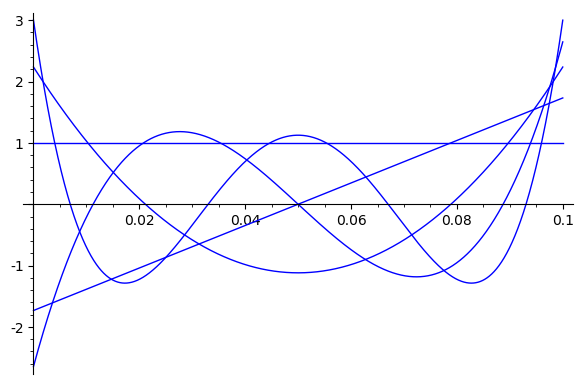

In [124]:
sum([plot(phi[i](x_to_xi(x)), x, x_imh, x_iph) for i in range(5)])

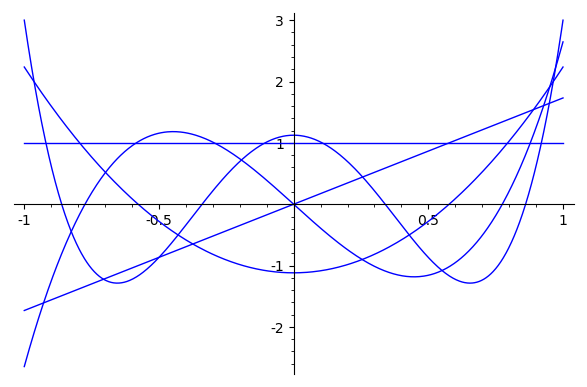

In [121]:
sum([plot(phi[i], x, -1, 1) for i in range(5)])

In [127]:
(phi[1](x_to_xi(x))*phi[1](x_to_xi(x))).integrate(x, x_imh, x_iph)

1/10

Testing 

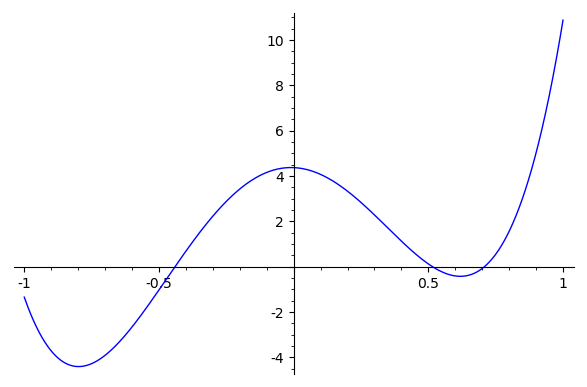

In [132]:
q_coeffs = [1, 2, -1, 1, 2]
plot(sum([phi[l](xi)*q_coeffs[l] for l in range(5)]), xi, -1, 1)

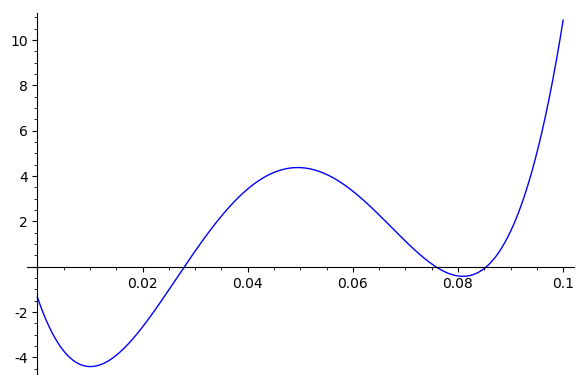

In [133]:
q_coeffs = [1, 2, -1, 1, 2]
plot(sum([phi[l](x_to_xi(x))*q_coeffs[l] for l in range(5)]), x, x_imh, x_iph)

In [134]:
q_1_coeffs = [1, 2, -1, 1, 2]
q_2_coeffs = [3, 1, -1, 2, -1]
q_3_x_coeffs = [5, 2, -2, 1, 1]
u(x) = sum([phi[l](x_to_xi(x))*q_2_coeffs[l] for l in range(5)])/sum([phi[l](x_to_xi(x))*q_1_coeffs[l] for l in range(5)])
q_3_x(x) = sum([phi[l](x_to_xi(x))*q_3_x_coeffs[l] for l in range(5)])
(phi[1](x_to_xi(x))*u(x)*q_3_x(x)).integrate(x, x_imh, x_iph)

1/396900*sqrt(5)*sqrt(3)*(sqrt(7)*(7151*sqrt(5) - 9081) - 3024*sqrt(5)*sqrt(3) - 10206*sqrt(3))

In [3]:
phi = get_legendre_polynomials(5, 1/2)

In [7]:
phi[3]

x |--> 7/2*sqrt(1/7)*(5*x^3 - 3*x)

In [8]:
matrix.identity(5)

[1 0 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]